<a href="https://colab.research.google.com/github/HaseebUlHassan437/LSTM-next-word-predictor/blob/main/Next_word_predictor_using_lstm_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
faqs = """About Object Detection
What is Object Detection?
Object Detection is a computer vision task that involves locating and classifying multiple objects within an image or video. It draws bounding boxes around objects and assigns them labels.

How is Object Detection different from Image Classification?
Image Classification assigns a single label to an entire image, whereas Object Detection identifies and classifies multiple objects within an image and tells you where they are using bounding boxes.

What are the most popular Object Detection algorithms?
Some of the most widely used object detection models are:
YOLO (You Only Look Once)
SSD (Single Shot Multibox Detector)
Faster R-CNN
DETR (DEtection TRansformer)

What is YOLO and why is it so popular?
YOLO is a real-time object detection algorithm that is very fast and accurate. It treats object detection as a single regression problem and is widely used for real-time applications like surveillance and robotics.

What is IoU (Intersection over Union)?
IoU is a metric used to evaluate the overlap between the predicted bounding box and the ground truth box. Higher IoU indicates better detection accuracy.

What is mAP (mean Average Precision)?
mAP is a performance metric used to evaluate object detection models. It calculates the average precision across all classes and IoU thresholds.

What are the common datasets used in Object Detection?
Some popular datasets include:
COCO (Common Objects in Context)
PASCAL VOC
ImageNet Detection
Open Images Dataset

How do we annotate data for object detection tasks?
Annotation tools like LabelImg, CVAT, and Roboflow are commonly used to draw bounding boxes and generate dataset files in formats like XML, JSON, or YOLO TXT.

What are the main challenges in Object Detection?
Challenges include:
Detecting small or overlapping objects
Varying lighting and background conditions
Real-time detection speed
Handling multiple object classes

What is real-time object detection?
Real-time detection means the model can process and detect objects in video streams or live camera feeds quickly, typically using optimized models like YOLOv5 or YOLOv8.

Can Object Detection work on videos?
Yes, object detection models can be applied frame-by-frame to videos to detect and track objects in motion.

What is Transfer Learning in Object Detection?
Transfer Learning involves using a pre-trained model (like YOLOv5 trained on COCO) and fine-tuning it on a custom dataset. This speeds up training and improves performance on specific tasks.

How is Object Detection used in the real world?
Applications include:
Surveillance and security
Autonomous vehicles
Retail analytics
Healthcare (e.g. tumor detection in scans)
Industrial inspection
Wildlife monitoring

What programming languages and libraries are used for Object Detection?
Mostly Python. Key libraries include:
OpenCV
PyTorch
TensorFlow
Detectron2
MMDetection
Ultralytics YOLO

Is Object Detection the same as Object Tracking?
No. Object Detection finds objects in individual frames. Object Tracking follows those detected objects across frames in a video.

What hardware is required for Object Detection?
A machine with a decent GPU is ideal for training models. For deployment, lightweight models can run on edge devices like Raspberry Pi or Jetson Nano.

Can I build a custom object detector?
Yes, you can. You need to collect images, annotate them, choose a model (e.g. YOLOv5), train it on your dataset, and evaluate its performance.

Is it necessary to train from scratch?
No. It’s usually better to fine-tune pre-trained models unless you have a very large and diverse dataset.

Where can I learn more about Object Detection?
Great resources include:
Ultralytics YOLOv5 Docs - https://docs.ultralytics.com
PyImageSearch blog - https://pyimagesearch.com
TensorFlow Object Detection API - https://github.com/tensorflow/models/tree/master/research/object_detection
OpenCV Tutorials - https://docs.opencv.org/

What format is the output of an Object Detection model?
Typically: a list of bounding box coordinates, object class names, and confidence scores for each detected object.

"""


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [3]:
tokenizer = Tokenizer()

In [4]:
tokenizer.fit_on_texts([faqs])

In [9]:
faqs

'About Object Detection\nWhat is Object Detection?\nObject Detection is a computer vision task that involves locating and classifying multiple objects within an image or video. It draws bounding boxes around objects and assigns them labels.\n\nHow is Object Detection different from Image Classification?\nImage Classification assigns a single label to an entire image, whereas Object Detection identifies and classifies multiple objects within an image and tells you where they are using bounding boxes.\n\nWhat are the most popular Object Detection algorithms?\nSome of the most widely used object detection models are:\nYOLO (You Only Look Once)\nSSD (Single Shot Multibox Detector)\nFaster R-CNN\nDETR (DEtection TRansformer)\n\nWhat is YOLO and why is it so popular?\nYOLO is a real-time object detection algorithm that is very fast and accurate. It treats object detection as a single regression problem and is widely used for real-time applications like surveillance and robotics.\n\nWhat is I

In [13]:
len(tokenizer.word_index)

283

In [14]:
input_sequences = []
for sentence in faqs.split('\n'):
  tokenized_sentence = tokenizer.texts_to_sequences([sentence])[0]
  print(tokenized_sentence)

  for i in range(1,len(tokenized_sentence)):
    input_sequences.append(tokenized_sentence[:i+1])
    print(input_sequences)

[50, 1, 2]
[[50, 1]]
[[50, 1], [50, 1, 2]]
[6, 4, 1, 2]
[[50, 1], [50, 1, 2], [6, 4]]
[[50, 1], [50, 1, 2], [6, 4], [6, 4, 1]]
[[50, 1], [50, 1, 2], [6, 4], [6, 4, 1], [6, 4, 1, 2]]
[1, 2, 4, 5, 102, 103, 104, 51, 52, 105, 3, 106, 33, 9, 53, 28, 21, 17, 34, 13, 107, 22, 35, 108, 9, 3, 54, 55, 109]
[[50, 1], [50, 1, 2], [6, 4], [6, 4, 1], [6, 4, 1, 2], [1, 2]]
[[50, 1], [50, 1, 2], [6, 4], [6, 4, 1], [6, 4, 1, 2], [1, 2], [1, 2, 4]]
[[50, 1], [50, 1, 2], [6, 4], [6, 4, 1], [6, 4, 1, 2], [1, 2], [1, 2, 4], [1, 2, 4, 5]]
[[50, 1], [50, 1, 2], [6, 4], [6, 4, 1], [6, 4, 1, 2], [1, 2], [1, 2, 4], [1, 2, 4, 5], [1, 2, 4, 5, 102]]
[[50, 1], [50, 1, 2], [6, 4], [6, 4, 1], [6, 4, 1, 2], [1, 2], [1, 2, 4], [1, 2, 4, 5], [1, 2, 4, 5, 102], [1, 2, 4, 5, 102, 103]]
[[50, 1], [50, 1, 2], [6, 4], [6, 4, 1], [6, 4, 1, 2], [1, 2], [1, 2, 4], [1, 2, 4, 5], [1, 2, 4, 5, 102], [1, 2, 4, 5, 102, 103], [1, 2, 4, 5, 102, 103, 104]]
[[50, 1], [50, 1, 2], [6, 4], [6, 4, 1], [6, 4, 1, 2], [1, 2], [1, 2, 4], [1, 

In [15]:
input_sequences

[[50, 1],
 [50, 1, 2],
 [6, 4],
 [6, 4, 1],
 [6, 4, 1, 2],
 [1, 2],
 [1, 2, 4],
 [1, 2, 4, 5],
 [1, 2, 4, 5, 102],
 [1, 2, 4, 5, 102, 103],
 [1, 2, 4, 5, 102, 103, 104],
 [1, 2, 4, 5, 102, 103, 104, 51],
 [1, 2, 4, 5, 102, 103, 104, 51, 52],
 [1, 2, 4, 5, 102, 103, 104, 51, 52, 105],
 [1, 2, 4, 5, 102, 103, 104, 51, 52, 105, 3],
 [1, 2, 4, 5, 102, 103, 104, 51, 52, 105, 3, 106],
 [1, 2, 4, 5, 102, 103, 104, 51, 52, 105, 3, 106, 33],
 [1, 2, 4, 5, 102, 103, 104, 51, 52, 105, 3, 106, 33, 9],
 [1, 2, 4, 5, 102, 103, 104, 51, 52, 105, 3, 106, 33, 9, 53],
 [1, 2, 4, 5, 102, 103, 104, 51, 52, 105, 3, 106, 33, 9, 53, 28],
 [1, 2, 4, 5, 102, 103, 104, 51, 52, 105, 3, 106, 33, 9, 53, 28, 21],
 [1, 2, 4, 5, 102, 103, 104, 51, 52, 105, 3, 106, 33, 9, 53, 28, 21, 17],
 [1, 2, 4, 5, 102, 103, 104, 51, 52, 105, 3, 106, 33, 9, 53, 28, 21, 17, 34],
 [1,
  2,
  4,
  5,
  102,
  103,
  104,
  51,
  52,
  105,
  3,
  106,
  33,
  9,
  53,
  28,
  21,
  17,
  34,
  13],
 [1,
  2,
  4,
  5,
  102,
  103,
 

In [36]:
max_len = max([len(x) for x in input_sequences])
max_len

35

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_input_sequences = pad_sequences(input_sequences, maxlen = max_len, padding='pre')

In [18]:
padded_input_sequences

array([[  0,   0,   0, ...,   0,  50,   1],
       [  0,   0,   0, ...,  50,   1,   2],
       [  0,   0,   0, ...,   0,   6,   4],
       ...,
       [  0,   0,   0, ..., 282,  15, 283],
       [  0,   0,   0, ...,  15, 283,  98],
       [  0,   0,   0, ..., 283,  98,   1]], dtype=int32)

In [19]:
X = padded_input_sequences[:,:-1]

In [20]:
y = padded_input_sequences[:,-1]

In [21]:
X.shape

(565, 34)

In [22]:
y.shape

(565,)

In [31]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

284


In [23]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y,num_classes=284)

In [24]:
y.shape

(565, 284)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [41]:
model = Sequential()
model.add(Embedding(284, 100, input_length=35))
model.add(LSTM(150,return_sequences=True))
model.add(LSTM(150))
model.add(Dense(284, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [42]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
history = model.fit(X,y,epochs=100)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.0399 - loss: 5.5781
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0688 - loss: 5.1605
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0641 - loss: 5.1275
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0580 - loss: 4.9825
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0596 - loss: 4.9533
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0905 - loss: 4.8656
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0751 - loss: 4.8797
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0481 - loss: 4.7542
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0959 - loss: 4.6304
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0793 - loss: 4.6178
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0920 - loss: 4.4877
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accu

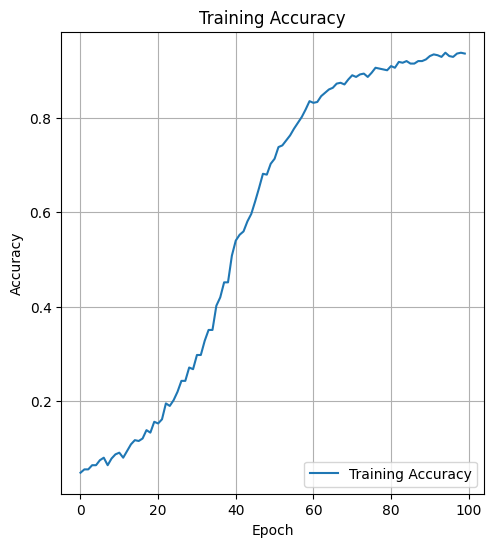

In [45]:
import matplotlib.pyplot as plt

# Get the training history data
acc = history.history['accuracy']
loss = history.history['loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)



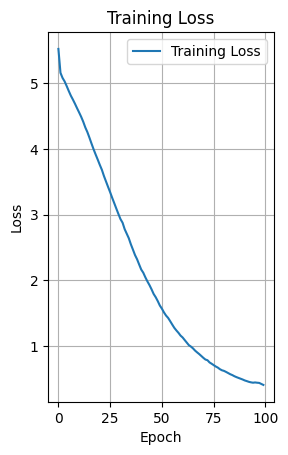

In [46]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.show()

In [52]:
import numpy as np
import time
text = "YOLO is a real-time object"

for i in range(35):
  # tokenize
  token_text = tokenizer.texts_to_sequences([text])[0]
  # padding
  padded_token_text = pad_sequences([token_text], maxlen=35, padding='pre')
  # predict
  pos = np.argmax(model.predict(padded_token_text))

  for word,index in tokenizer.word_index.items():
    if index == pos:
      text = text + " " + word
      print(text)
      time.sleep(0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
YOLO is a real-time object detection
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
YOLO is a real-time object detection algorithm
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
YOLO is a real-time object detection algorithm that
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
YOLO is a real-time object detection algorithm that is
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
YOLO is a real-time object detection algorithm that is very
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
YOLO is a real-time object detection algorithm that is very fast
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
YOLO is a real-time object detection algorithm that is very fast and
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
YOLO is a real-time object detection algorithm that is very fast and accurate
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
YOLO is a real-time object detection algorithm that is very fast and accurate it
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
YOLO is a real-time object detection algorithm that is very fast and accurat

In [53]:
tokenizer.word_index

{'object': 1,
 'detection': 2,
 'and': 3,
 'is': 4,
 'a': 5,
 'what': 6,
 'the': 7,
 'in': 8,
 'objects': 9,
 'to': 10,
 'used': 11,
 'models': 12,
 'it': 13,
 'are': 14,
 'for': 15,
 'can': 16,
 'or': 17,
 'real': 18,
 'like': 19,
 'on': 20,
 'image': 21,
 'bounding': 22,
 'you': 23,
 'yolo': 24,
 'time': 25,
 'include': 26,
 'dataset': 27,
 'an': 28,
 'iou': 29,
 'model': 30,
 'yolov5': 31,
 'https': 32,
 'multiple': 33,
 'video': 34,
 'boxes': 35,
 'how': 36,
 'single': 37,
 'using': 38,
 'popular': 39,
 'of': 40,
 'evaluate': 41,
 'box': 42,
 'performance': 43,
 'trained': 44,
 'opencv': 45,
 'tensorflow': 46,
 'ultralytics': 47,
 'docs': 48,
 'com': 49,
 'about': 50,
 'that': 51,
 'involves': 52,
 'within': 53,
 'assigns': 54,
 'them': 55,
 'from': 56,
 'classification': 57,
 'where': 58,
 'most': 59,
 'some': 60,
 'widely': 61,
 'detector': 62,
 'very': 63,
 'as': 64,
 'applications': 65,
 'surveillance': 66,
 'metric': 67,
 'better': 68,
 'map': 69,
 'average': 70,
 'precision':